## Moving Window Functions(這部分有興趣可以自行研讀)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt

read_csv:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [42]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px[:10]

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [22]:
close_px = close_px.resample('B').ffill()
close_px[:10]

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html

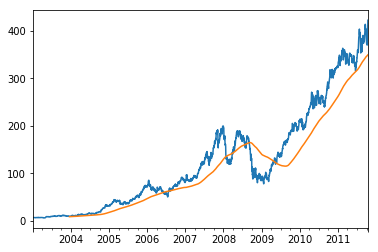

In [24]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()
#rolling(n)即為取最近n行數據的意思，只計算這n行數據。後面可以接各類計算函數，例如max、min、std等

In [5]:
plt.figure()

The expression rolling(250) is similar in behavior to groupby, but instead of grouping it creates an object that enables grouping over a 250-day sliding window. So here we have the 250-day moving window average of Apple’s stock price.

In [30]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[:12]
#min_periods: 每個窗口最少包含的觀測值數量，小於這個值的窗口結果為NA。值可以是int，默認None。offset情況下，默認為1

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

**By default rolling functions** require all of the values in the window to be **non-NA**.

This behavior can be changed to account for missing data and, in particular, the fact that you will have fewer than window periods of data at the beginning of the time series


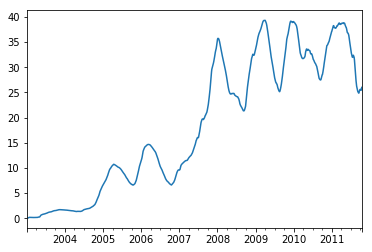

In [31]:
appl_std250.plot()

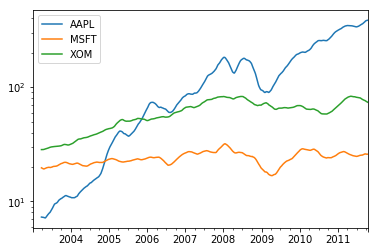

In [36]:
expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)
#expanding即為取從頭至今的數據。後面可以接各類計算函數
#rolling 和expending的區別，rolling是指定週期長度，不斷向下滾動操作，expanding是從最初截至現在。

DataFrame.rolling(window, min_periods=None, freq=None, center=False, win_type=None, on=None, axis=0, closed=None)[source]

window:移動窗口的大小。值可以是int（整數值）或offset（偏移）。如果是整數值的話，每個窗口是固定的大小，即包含相同數量的觀測值。值為offset（偏移時長,eg: '2s'）則指定了每個窗口包含的時間段，每個窗口包含的觀測值的數量是不一定的。offset必須在index是時間類型數據時才可以使用。

In [38]:
close_px.rolling('20D').mean()[:10]

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


### Exponentially Weighted Functions

In [10]:
plt.figure()

span : float, optional
Specify decay in terms of span, α=2/(span+1), for span≥1

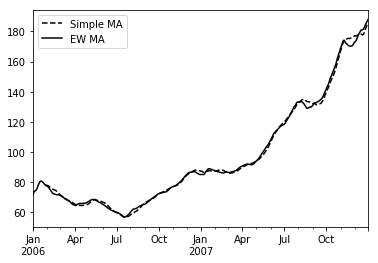

In [39]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pct_change.html

pct_change:Percent change over given number of periods.

In [40]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()


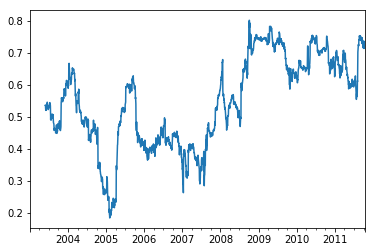

In [13]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [14]:
plt.figure()

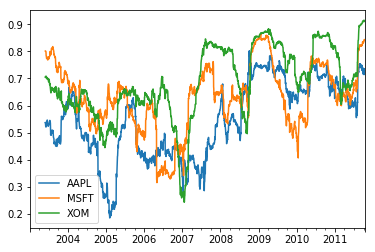

In [15]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()